In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_excel("Default1.xlsx")
data

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [19]:
data.shape
data.info()
data.describe(include='all')
(data.balance==0).sum(axis=0)
data.student.value_counts()

# Encoding categorical variable
data['default2']=data.default.factorize()[0]
data['student2']=data.student.factorize()[0]
data.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,Yes,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,0
2,3,No,No,1073.549164,31767.138947,0,1


In [20]:
data_dfno = data[data.default2 == 0].sample(frac=0.15)
data_dfyes = data[data.default2==1]
data_df = data_dfno.append(data_dfyes)
data_df

C:\Users\student\AppData\Local\Temp\ipykernel_11544\1299994648.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_dfno.append(data_dfyes)


,Unnamed: 0,default,student,balance,income,default2,student2
7369,7370,No,No,607.094632,27145.637541,0,1
6005,6006,No,No,271.059866,30465.307573,0,1
4930,4931,No,No,1141.157938,44333.210625,0,1
9683,9684,No,No,1132.174903,56152.429040,0,1
3216,3217,No,Yes,1060.776827,21430.791224,0,0
...,...,...,...,...,...,...,...
9912,9913,Yes,No,2148.898454,44309.917173,1,1
9921,9922,Yes,Yes,1627.898323,17546.997016,1,0
9949,9950,Yes,No,1750.253150,51578.940163,1,1
9951,9952,Yes,No,1515.606239,48688.512086,1,1


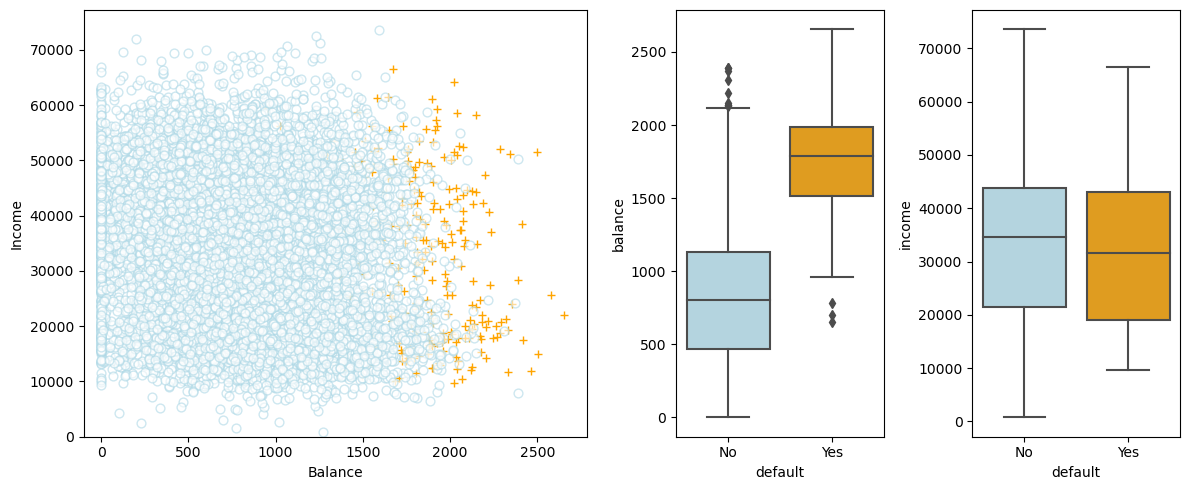

In [21]:
fig = plt.figure(figsize=(12,5))
gs= mpl.gridspec.GridSpec(1,4)
ax1=plt.subplot(gs[0,:2])
ax2=plt.subplot(gs[0,2:3])
ax3=plt.subplot(gs[0,3:4])
ax1.scatter(data[data.default=="Yes"].balance,data[data.default=="Yes"].income,s=40,c='orange',marker='+',linewidths=1)
ax1.scatter(data[data.default=="No"].balance,data[data.default=="No"].income,s=40,marker='o',linewidths=1,edgecolors='lightblue',facecolors="white",alpha=.6)

# Graphical representation
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')
c_palette ={'No':'lightblue','Yes':'orange'}
sns.boxplot(x=data['default'],y=data['balance'],orient='v',ax=ax2,palette=c_palette)
sns.boxplot(x=data['default'],y=data['income'],orient='v',ax=ax3,palette=c_palette)
gs.tight_layout(plt.gcf())

# Logistic Regression using sklearn

In [28]:
x_train = data.balance.values.reshape(-1,1)
y= data.default2
x_test = np.arange(data.balance.min(),data.balance.max()).reshape(-1,1)
x_test

array([[0.000e+00],
       [1.000e+00],
       [2.000e+00],
       ...,
       [2.652e+03],
       [2.653e+03],
       [2.654e+03]])

In [29]:
import sklearn.linear_model as skl_lm

In [32]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)


LogisticRegression(solver='newton-cg')

In [33]:
prob = clf.predict_proba(x_test)
prob

array([[9.99976331e-01, 2.36688332e-05],
       [9.99976201e-01, 2.37993415e-05],
       [9.99976069e-01, 2.39305694e-05],
       ...,
       [1.92313398e-02, 9.80768660e-01],
       [1.91278958e-02, 9.80872104e-01],
       [1.90249974e-02, 9.80975003e-01]])

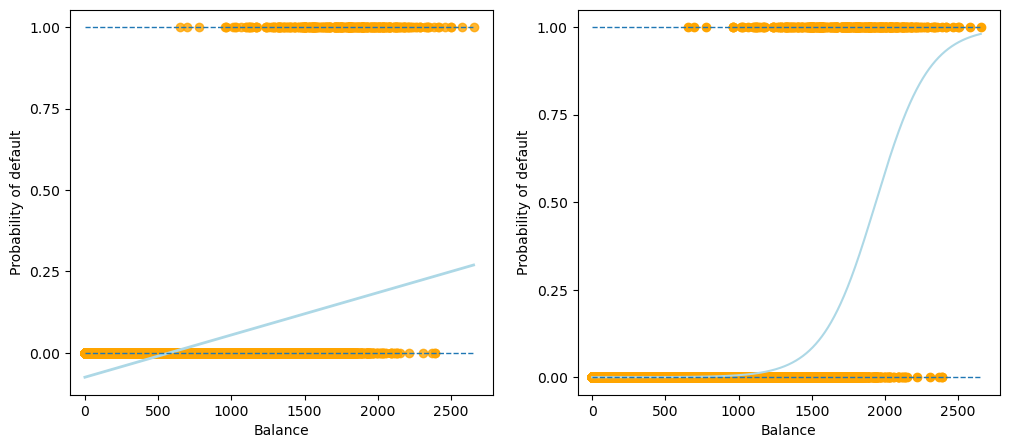

In [36]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(12,5))
sns.regplot(x=data.balance,y=data.default2,order=1,ci=None,scatter_kws={'color':'orange'},line_kws={'color':'lightblue','lw':2},ax=ax1)
ax2.scatter(x_train,y,color="orange")
ax2.plot(x_test,prob[:,1],color='lightblue')

for ax in fig.axes:
    ax.hlines(1,xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1],linestyles='dashed',lw=1)
    ax.hlines(0,xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1],linestyles='dashed',lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel("Balance")
    ax.set_yticks([0,0.25,0.5,0.75,1])
    ax.set_xlim(xmin=-100)

In [38]:
print(clf)
print('classes: ',clf.classes_)
print("coefficients: ",clf.coef_)
print('intercept: ',clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept:  [-10.65132776]


# Logistic Regression (x=Balance ) Using statsmodel

In [39]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms

In [40]:
x_train = sm.add_constant(data.balance)
est = sm.Logit(y.ravel(),x_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [42]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [43]:
x_train = sm.add_constant(data.student2)
y= data.default2
est=sms.Logit(y,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.145436
         Iterations 7


In [45]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0996      0.091    -34.169      0.000      -3.277      -2.922
student2      -0.4044      0.115     -3.516      0.000      -0.630      -0.179


# Multiple Logistic Regression

In [46]:
x_train =sm.add_constant(data[['balance','income','student2']])

est=sms.Logit(y,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [47]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5158      0.438    -26.299      0.000     -12.374     -10.658
balance        0.0057      0.000     24.736      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2       0.6468      0.236      2.738      0.006       0.184       1.110


# Confounding

In [85]:
x_train = data[data.student=='Yes'].balance.values.reshape(-1,1)
y=data[data.student =="Yes"].default2

x_train2 = data[data.student == "No"].balance.values.reshape(-1,1)
y2 = data[data.student == "No"].default2

X_test = np.arange(data.balance.min(),data.balance.max()).reshape(-1,1)
x_test

array([[0.000e+00],
       [1.000e+00],
       [2.000e+00],
       ...,
       [2.652e+03],
       [2.653e+03],
       [2.654e+03]])

In [87]:

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')
display(clf.fit(x_train,y))
display(clf2.fit(x_train2,y2))


LogisticRegression(solver='newton-cg')

LogisticRegression(solver='newton-cg')

In [88]:
prob = clf.predict_proba(x_test)
prob2 = clf2.predict_proba(x_test)

<Axes: xlabel='student', ylabel='balance'>

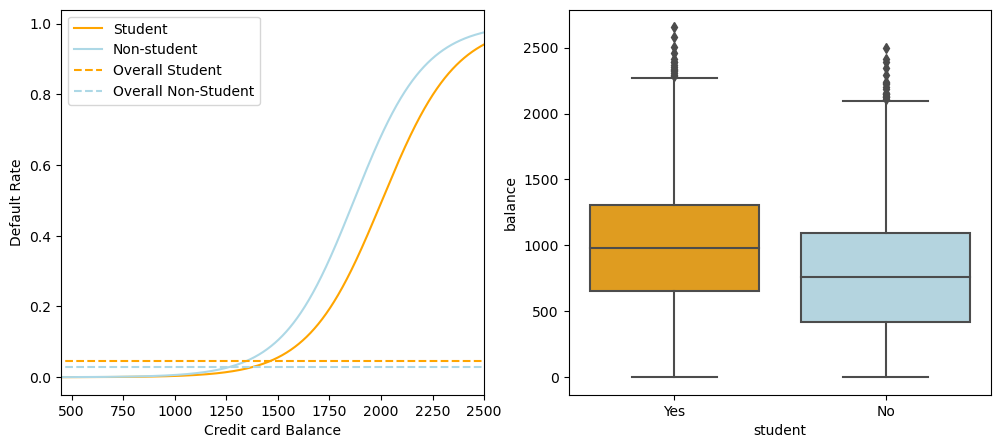

In [90]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(12,5))
ax1.plot(x_test,prob[:,1],color='orange',label='Student')
ax1.plot(x_test,prob2[:,1],color='lightblue',label='Non-student')
ax1.hlines(127/2817,colors='orange',label='Overall Student',xmin = ax1.xaxis.get_data_interval()[0],xmax = ax1.xaxis.get_data_interval()[1],linestyles='dashed')
ax1.hlines(206/6850,colors='lightblue',label='Overall Non-Student',xmin = ax1.xaxis.get_data_interval()[0],xmax = ax1.xaxis.get_data_interval()[1],linestyles='dashed')

ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit card Balance')
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)


#Right plot
sns.boxplot(x='student',y='balance',data= data,orient='v',ax=ax2,palette=c_palette)

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x = data[['balance','income','student2']]
y = data.default2

lda = LinearDiscriminantAnalysis(solver = 'svd')

y_pred = lda.fit(x,y).predict(x)
data_df = pd.DataFrame({'True default status ':y,'Predicted default status': y_pred})

In [103]:
data_df.replace(to_replace={0:'No',1:'Yes'},inplace=True)
data_df.groupby(['Predicted default status','True default Status']).size().unstack('True default status')

KeyError: 'True default Status'

In [100]:
decision_prob =0.2
y_prob =lda.fit(x,y).predict_proba(x)

data_df = pd.DataFrame({'True default status':y,'Predicted default status':y_prob[:,1]>decision_prob})

data_df.replace(to_replace = {0:'No',1:'Yes','True':'Yes','False':'No'},inplace=True)
data_df.groupby(['Predicted default status','True default Status']).size().unstack('True default status')

KeyError: 'True default Status'